# Customizing Matplotlib: Configurations and StyleSheets

Matplotlib's default plot settings are often the subject of complaint among its users. While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer stylesheets feature, which contains some nice sets of default configurations.

## Plot Customization by Hand
Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default. It's possible to do these customizations for each individual plot. For example, here is a fairly drab default histogram:


In [12]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

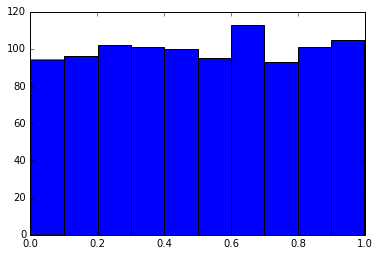

In [16]:
x = np.random.rand(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot

(array([  94.,   96.,  102.,  101.,  100.,   95.,  113.,   93.,  101.,  105.]),
 array([ 0.00233706,  0.1018425 ,  0.20134794,  0.30085338,  0.40035882,
         0.49986426,  0.5993697 ,  0.69887514,  0.79838058,  0.89788603,
         0.99739147]),
 <a list of 10 Patch objects>)

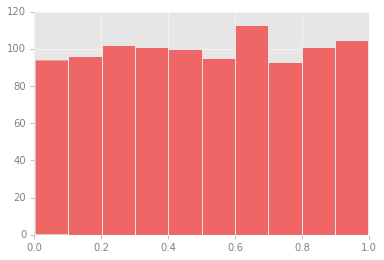

In [18]:
# use a gray background
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

#Lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
       
# control face and edge color of histogram

ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')

This looks better, and you may recognize the look as inspired by the look of the R language's ggplot visualization package. But this took a whole lot of effort! We definitely do not want to have to do all that tweaking each time we create a plot. Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: rcParams
Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.rc convenience routine. Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current rcParams dictionary, so we can easily reset these changes in the current session:

In [19]:
IPython_default = plt.rcParams.copy()

Now we can use the plt.rc function to change some of these settings:


In [21]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action


(array([  94.,   96.,  102.,  101.,  100.,   95.,  113.,   93.,  101.,  105.]),
 array([ 0.00233706,  0.1018425 ,  0.20134794,  0.30085338,  0.40035882,
         0.49986426,  0.5993697 ,  0.69887514,  0.79838058,  0.89788603,
         0.99739147]),
 <a list of 10 Patch objects>)

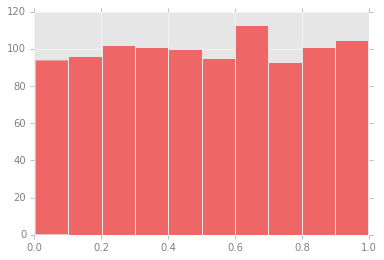

In [22]:
plt.hist(x)

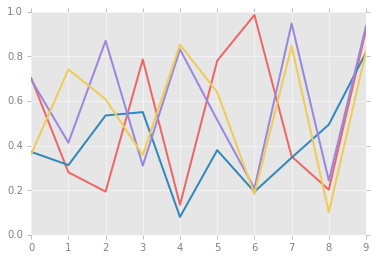

In [23]:
for i in range(4):
    plt.plot(np.random.rand(10))

## StyleSheets



In [25]:
plt.style.available[:5]

['fivethirtyeight',
 'dark_background',
 'seaborn-ticks',
 'seaborn-deep',
 'seaborn-pastel']

The basic way to switch to a stylesheet is to call

    plt.style.use('stylename') 

But keep in mind that this will change the style for the rest of the session! Alternatively, you can use the style context manager, which sets a style temporarily:

with plt.style.context('stylename'):

    make_a_plot()

Let's create a function that will make two basic types of plot:

In [26]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

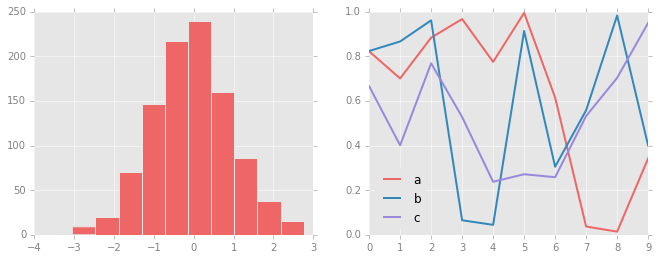

In [28]:
hist_and_lines()

## FiveThirtyEight style

The fivethirtyeight style mimics the graphics found on the popular [FiveThirtyEight](https://fivethirtyeight.com/) website. As you can see here, it is typified by bold colors, thick lines, and transparent axes:

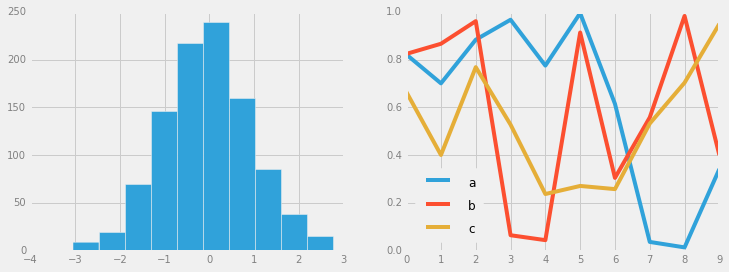

In [30]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

## ggplot

The ggplot package in R language is a very popular visualization too. Matplotlib's ggplot mimics the default styles from the package:

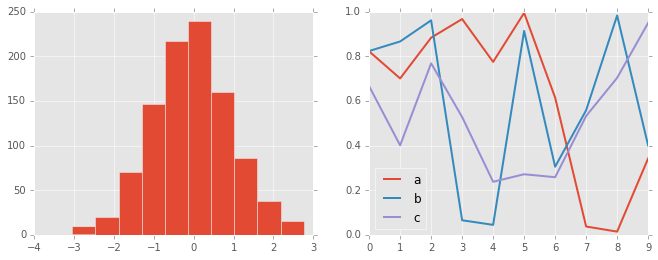

In [31]:
with plt.style.context('ggplot'):
    hist_and_lines()

## *Bayesian Method for Hackers 

There is a very nice short online book called [ Probabilistic Programming and Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures create with Matplotlib, and uses a nice set of rc parameters to create a consistent and viually-applealing style thorught the book. This style is reproduces in the *bmh* stylesheet:

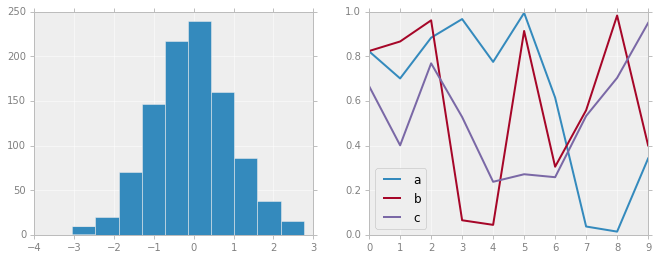

In [33]:
with plt.style.context('bmh'):
    hist_and_lines()

# Dark background


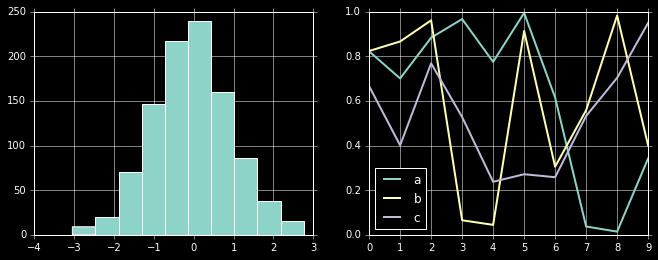

In [35]:
with plt.style.context('dark_background'):
    hist_and_lines()

# Grayscale

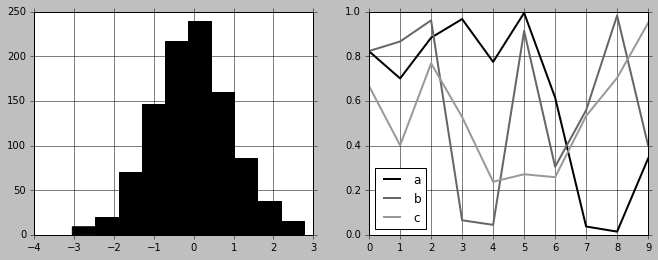

In [39]:
with plt.style.context('grayscale'):
    hist_and_lines()

# Seaborn

Is useful, because it is mostly nice to look as

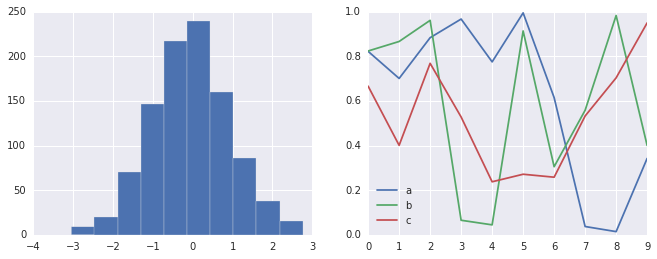

In [40]:
import seaborn
hist_and_lines()